# Visualización del mapa TRAM en Alicante

Nota: en la visualización geográfica se pueden seleccionar tantas rutas como se deseen visualizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# librerías para visualizar en mapa geográfico
import folium # librería mapa
from folium import plugins # iconos de mapa
from ipywidgets import interact
from branca.element import Template, MacroElement # librería leyenda

In [2]:
trips = pd.read_csv('trips.txt')
routes = pd.read_csv('routes.txt')
stops = pd.read_csv('stops.txt')
shapes = pd.read_csv('shapes.txt')

## Visualización en mapa

In [3]:
# diccionario con el identificador de cada ruta
dict_routeid = {}
for i in trips.route_id.unique():
    route_unique = trips.loc[trips['route_id'] == i].shape_id.unique()[0]
    color = routes.loc[routes['route_id'] == i].route_color.unique()[0]
    dict_routeid[route_unique] = i, '#'+ color

In [4]:
# diccionario con el color de cada ruta
list(dict_routeid.values())
dict_colors = {}
for i in list(dict_routeid.values()):
    dict_colors[i[0]] = i[1]

In [5]:
# para cada ruta se obtiene su identificador de ruta
shapes['shape_id'] = shapes['shape_id'].apply(lambda x: (dict_routeid[x][0] if x in dict_routeid.keys() else None))

In [6]:
# selección de un sentido de las rutas de doble sentido
unique_shapeid = ['B-LC', # línea 1
                  'LC-SV', #línea 2
                  'CM-LC', #línea 3
                  'LC-PC', #línea 4
                  'PC-PM', #línea 5
                  'B-D'] #línea 9
shapes = shapes.loc[shapes['shape_id'].isin(unique_shapeid)]
shapes.sort_values(by=['shape_id', 'shape_pt_sequence'], inplace = True)

In [7]:
# Se crea un dataframe con las filas de cada linea
line_tram = []
[line_tram.append(shapes.loc[shapes['shape_id'] == i]) for i in shapes.shape_id.unique()]

# añadir color a cada ruta
for i in line_tram:
    color_i = dict_colors[i.shape_id.unique()[0]]
    i['color'] = color_i

# crear rutas individuales
L9_df,L1_df,L3_df,L4_df,L2_df,L5_df = line_tram

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


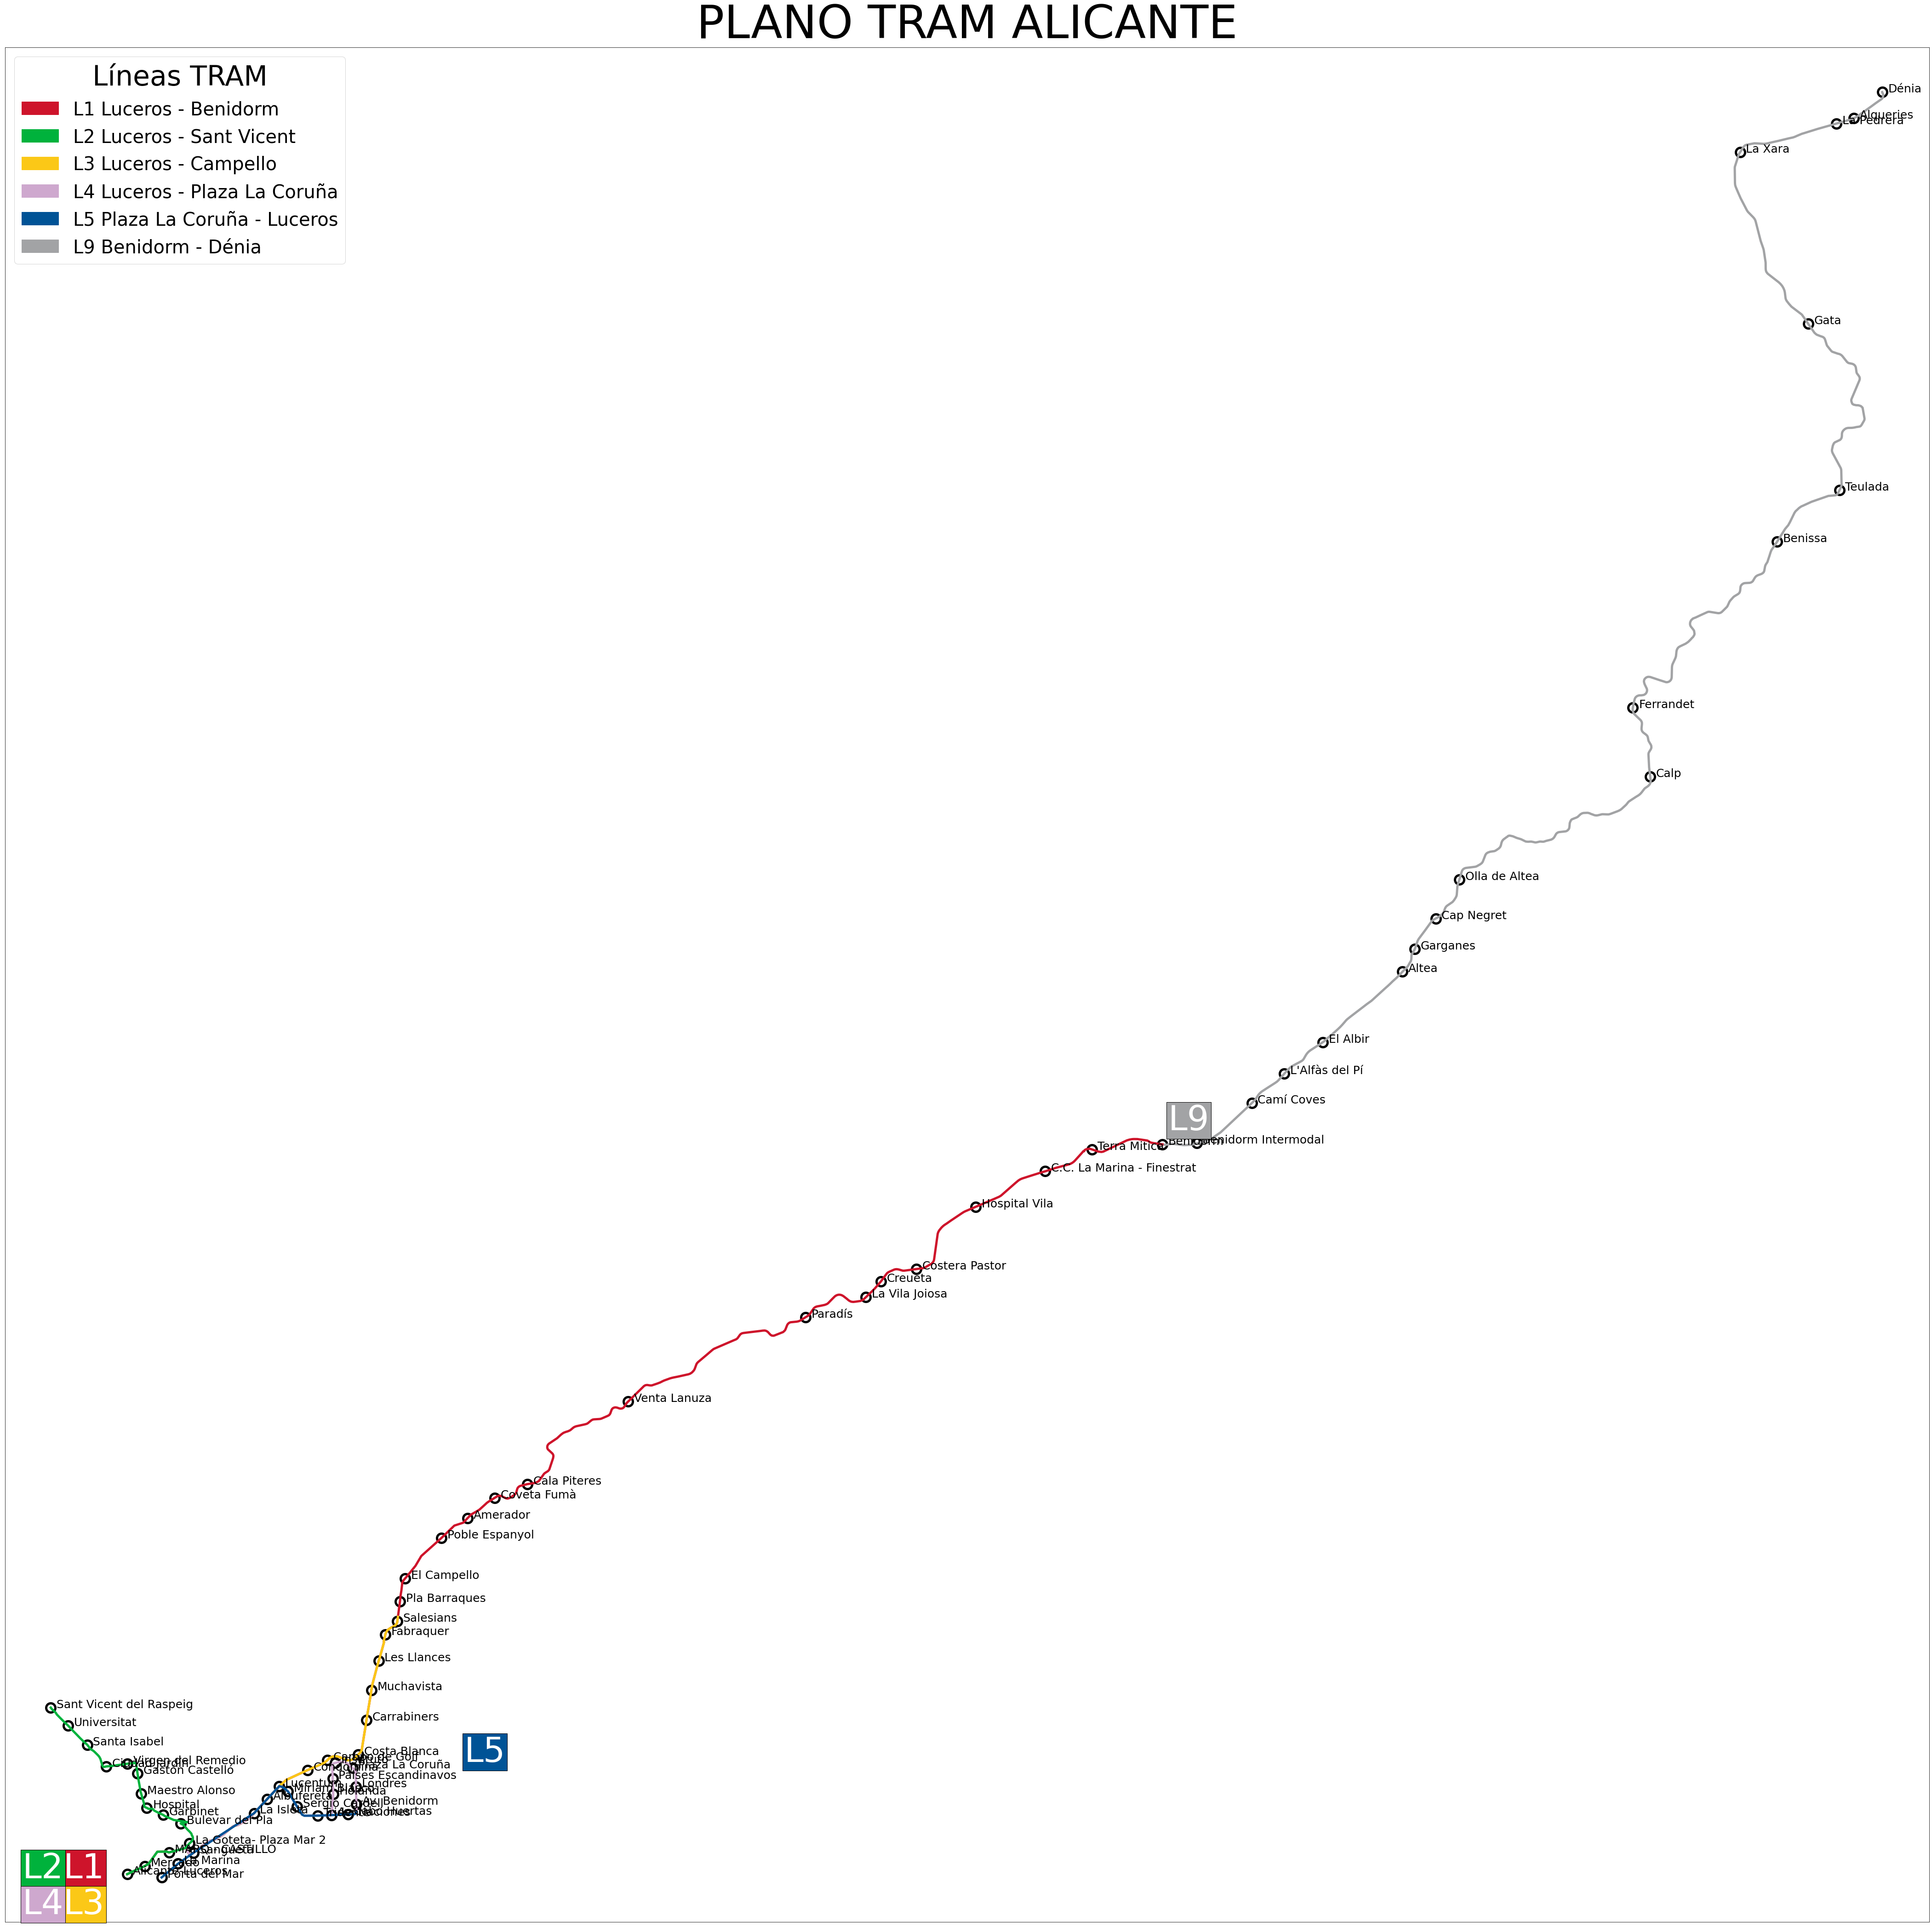

In [9]:
# VISUALIZACION DEL PLANO DEL TRANVÍA EN ALICANTE
line_tram_list = [L9_df,L1_df,L3_df,L4_df,L2_df,L5_df]

fig, ax = plt.subplots(1, 1, figsize=(75, 75))
ax.margins(0.025) 
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title("PLANO TRAM ALICANTE", fontsize=100)

# Dibuja el contorno de cada linea en sus respectivos colores
for i in line_tram_list:
    plt.plot("shape_pt_lon","shape_pt_lat", data=i, color= i.color.unique()[0], linewidth=5.0)

# Puntos de las paradas
plt.scatter(stops["stop_lon"], stops["stop_lat"], s=400, c='white', linewidths=5 , edgecolors='black')

# Nombre estaciones
for i in range(0, len(stops)):
    plt.text(stops["stop_lon"][i]+0.002, stops["stop_lat"][i], stops["stop_name"][i], fontsize=25)

# Numeros de linea
plt.text(L1_df.iloc[-1,2]-0.022, L1_df.iloc[-1,1]-0.001, "L1", fontsize=75, color='white', 
         bbox=dict(facecolor=L1_df.color.unique()[0]))

plt.text(L2_df.iloc[0,2]-0.036, L2_df.iloc[0,1]-0.001, "L2", fontsize=75, color='white', 
         bbox=dict(facecolor=L2_df.color.unique()[0]))

plt.text(L3_df.iloc[-1,2]-0.022, L3_df.iloc[-1,1]-0.011, "L3", fontsize=75, color='white', 
         bbox=dict(facecolor=L3_df.color.unique()[0]))

plt.text(L4_df.iloc[0,2]-0.036, L4_df.iloc[0,1]-0.011, "L4", fontsize=75, color='white', 
         bbox=dict(facecolor=L4_df.color.unique()[0]))

plt.text(L5_df.iloc[0,2]+0.037, L5_df.iloc[0,1]+0.014, "L5", fontsize=75, color='white', 
         bbox=dict(facecolor=L5_df.color.unique()[0]))

plt.text(L9_df.iloc[0,2]+0.002, L9_df.iloc[0,1]+0.004, "L9", fontsize=75, color='white', 
         bbox=dict(facecolor=L9_df.color.unique()[0]))

# Leyenda
ls_patches = []

patch = mpatches.Patch(color=L1_df.color.unique()[0], label='L1 Luceros - Benidorm')
ls_patches.append(patch)

patch = mpatches.Patch(color=L2_df.color.unique()[0], label='L2 Luceros - Sant Vicent')
ls_patches.append(patch)

patch = mpatches.Patch(color=L3_df.color.unique()[0], label='L3 Luceros - Campello')
ls_patches.append(patch)

patch = mpatches.Patch(color=L4_df.color.unique()[0], label='L4 Luceros - Plaza La Coruña')
ls_patches.append(patch)

patch = mpatches.Patch(color=L5_df.color.unique()[0], label='L5 Plaza La Coruña - Luceros')
ls_patches.append(patch)

patch = mpatches.Patch(color=L9_df.color.unique()[0], label='L9 Benidorm - Dénia')
ls_patches.append(patch)

ax.legend(handles=ls_patches, loc='upper left', title='Líneas TRAM', title_fontsize=60, fontsize=40)

plt.savefig('plano_metro_madrid_grupo11.png')

plt.show()

## Visualización en mapa geográfico

In [10]:
# localizaión de los comienzos de cada línea
start_line = {}
for i in dict_colors.keys():
    if i == 'LC-PC': # línea 4, luceros
        start_line[i] = [38.3459894, -0.490678644126355]
    elif i == 'B-D': # línea 9, Benidorm
        start_line[i] = [38.55954,-0.104015]
    elif i == 'B-LC': # línea 1, luceros
        start_line[i] = [38.3459894, -0.490678644126355]
    elif i == 'LC-SV': #línea 2, luceros
        start_line[i] = [38.3459894, -0.490678644126355] 
    elif i == 'CM-LC': #línea 3, Luceros
        start_line[i] = [38.3459894, -0.490678644126355] 
    else: #línea 5, Plaza coruña
        start_line[i] = [38.375071, -0.411945]

In [11]:
# número para icono en mapa geográfico
number_line = {}
for i in dict_colors.keys():
    if i == 'LC-PC': # línea 4, luceros
        number_line[i] = 4
    elif i == 'B-D': # línea 9, Benidorm
        number_line[i] = 9
    elif i == 'B-LC': # línea 1, luceros
        number_line[i] = 1
    elif i == 'LC-SV': #línea 2, luceros
        number_line[i] = 2 
    elif i == 'CM-LC': #línea 3, Luceros
        number_line[i] = 3 
    else: #línea 5, Plaza coruña
        number_line[i] = 5

In [13]:
# dibujo de la forma de cada ruta
def painting_route(line,m):
    color = line.color.unique()[0]
    shape_id = line.shape_id.unique()[0]
    # localización del punto de partida de cada ruta
    if number_line[shape_id]==1:
        loc = [L1_df.iloc[-1,1],L1_df.iloc[-1,2]]
    elif number_line[shape_id] ==2:
        loc = [L1_df.iloc[-1,1]+0.0002,L1_df.iloc[-1,2]-0.0001]
    elif number_line[shape_id] ==3:
        loc = [L1_df.iloc[-1,1]+0.0004,L1_df.iloc[-1,2]-0.0002]
    elif number_line[shape_id] ==4:
        loc = [L1_df.iloc[-1,1]+0.0006,L1_df.iloc[-1,2]-0.0004]
    elif number_line[shape_id] == 5:
        loc = [L5_df.iloc[0,1],L5_df.iloc[0,2]]
    else:
        loc = [L9_df.iloc[0,1],L9_df.iloc[0,2]]
        
    # dibujo de cada ruta
    for i in range(len(line)):
        folium.CircleMarker(location=[list(line.shape_pt_lat)[i], list(line.shape_pt_lon)[i]],
                            radius=1,
                            color=color).add_to(m)
    # icono de la ruta correspondiente   
    folium.Marker(location=loc,
                  icon=plugins.BeautifyIcon(icon="arrow-down",icon_shape="marker", number=number_line[shape_id], 
                  border_color= color, background_color=color) ).add_to(m)  


# visualización de las rutas de TRAM
@interact
def eu_accidents(L1=True, L2=True,L3=True,L4=True, L5=True, L9=True):
    m = folium.Map()
    m = folium.Map(location=[38.53816, -0.13098],zoom_start = 10, tiles ='Stamen Toner')

    # dibujo de línea 9
    if L9 == True:
        painting_route(L9_df,m)

    # dibujo de línea 1
    if L1 == True:
        painting_route(L1_df,m)

    # dibujo de línea 2
    if L2 == True:
        painting_route(L2_df,m)
        
    # dibujo de línea 3
    if L3 == True:
        painting_route(L3_df,m)

    # dibujo de línea 4
    if L4 == True:
        painting_route(L4_df,m)

    # dibujo de línea 5
    if L5 == True:
        painting_route(L5_df,m)

    
    # leyenda
    template = """
    {% macro html(this, kwargs) %}

    <!doctype html>
    <html lang="en">
    <head>
      <meta charset="utf-8">
      <meta name="viewport" content="width=device-width, initial-scale=1">
      <title>Líneas TRAM</title>
      <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
      <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>

      <script>
      $( function() {
        $( "#maplegend" ).draggable({
                        start: function (event, ui) {
                            $(this).css({
                                right: "auto",
                                top: "auto",
                                bottom: "auto"
                            });
                        }
                    });
    });

      </script>
    </head>
    <body>


    <div id='maplegend' class='maplegend' 
        style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
         border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

    <div class='legend-title'>TRAM Alicante</div>
    <div class='legend-scale'>
      <ul class='legend-labels'>
        <li><span style='background:#CE142B;opacity:0.7;'></span>L1 Luceros - Benidorm</li>
        <li><span style='background:#00B23C;opacity:0.7;'></span>L2 Luceros - Sant Vicent</li>
        <li><span style='background:#FBC817;opacity:0.7;'></span>L3 Luceros - Campello</li>
        <li><span style='background:#CEA8CE;opacity:0.7;'></span>L4 Luceros - Plaza La Coruña</li>
        <li><span style='background:#005396;opacity:0.7;'></span>L5 Plaza La Coruña - Luceros</li>
        <li><span style='background:#A2A3A5;opacity:0.7;'></span>L9 Benidorm - Dénia</li>

      </ul>
    </div>
    </div>

    </body>
    </html>

    <style type='text/css'>
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 1px solid #999;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    {% endmacro %}"""

    macro = MacroElement()
    macro._template = Template(template)

    m.get_root().add_child(macro)

    return m


interactive(children=(Checkbox(value=True, description='L1'), Checkbox(value=True, description='L2'), Checkbox…